## Misspec Boxplots

In [5]:
import os
import numpy as np
import jax.numpy as jnp
import jax.random as random
from scipy.stats import gaussian_kde
from rsnl.metrics import plot_and_save_coverage
from rsnl.examples.misspec_ma1 import calculate_summary_statistics, true_dgp
import matplotlib.pyplot as plt
import pickle as pkl
import arviz as az
import matplotlib.colors as mcolors

## Model param posterior plot

In [7]:
seed = 6
rng_key = random.PRNGKey(seed)
rng_key, sub_key1, sub_key2 = random.split(rng_key, 3)
true_params = jnp.array([0.0])
# true_params = prior.sample(sub_key1)
x_obs = calculate_summary_statistics(true_dgp(key=sub_key2))
print('x_obs: ', x_obs)

with open("../res/misspec_ma1/rsnl/seed_6/thetas.pkl", "rb") as f:
    theta_draws_rsnl = jnp.array(pkl.load(f))

thetas_rsnl = jnp.concatenate(theta_draws_rsnl, axis=0)
thetas_rsnl = jnp.squeeze(thetas_rsnl)

with open("../res/misspec_ma1/snl/seed_6/thetas.pkl", "rb") as f:
    theta_draws_snl = jnp.array(pkl.load(f))

thetas_snl = jnp.concatenate(theta_draws_snl, axis=0)
thetas_snl = jnp.squeeze(thetas_snl)


x_obs:  [0.01319789 0.00581751]


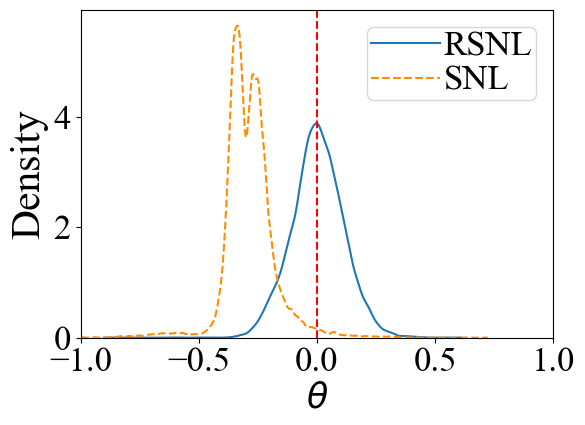

In [ ]:
# plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams.update({'font.size': 25})
plt.rcParams['xtick.labelsize'] = 25

az.plot_dist(thetas_rsnl, label="RSNL")

az.plot_dist(thetas_snl,
        color=mcolors.CSS4_COLORS['darkorange'],
        plot_kwargs={'linestyle': 'dashed'},
        label="SNL")

plt.xlabel(r"$\theta$", fontsize=25)
plt.xlim([-1, 1])
plt.ylim(bottom=0)
plt.legend(fontsize=25, borderpad=0.1, labelspacing=0.1, handletextpad=0.1)
plt.ylabel("Density", fontsize=30)
plt.axvline(x=0, color='red', linestyle='dashed')
# plt.title("$b_0 = 0.01$")
plt.tight_layout()
plt.savefig('misspec_ma1_posterior.pdf', bbox_inches='tight')

## Adjustment parameter plot

In [ ]:
with open("../res/misspec_ma1/rsnl/seed_6/adj_params.pkl", "rb") as f:
    adj_params = jnp.array(pkl.load(f))

adj_params = jnp.concatenate(adj_params, axis=0)


In [ ]:
# plt.rcParams['text.usetex'] = True
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams.update({'font.size': 25})

rng_key = random.PRNGKey(0)
prior_samples = random.laplace(rng_key, shape=(10000, 2))

for i in range(2):
    az.plot_dist(adj_params[:, i],
                 label='Posterior',
                 color='black')
    az.plot_dist(prior_samples[:, i],
                 color=mcolors.CSS4_COLORS['limegreen'],
                 plot_kwargs={'linestyle': 'dashed'},
                 label='Prior')
    plt.xlabel(f"$\gamma_{i+1}$", fontsize=25)
    plt.ylabel("Density", fontsize=25)
    plt.xlim([-10, 10])
    plt.ylim(bottom=0)
    plt.xticks(fontsize=25)
    plt.legend(fontsize=25,
               loc='upper left',
               borderpad=0.1, labelspacing=0.1, handletextpad=0.1)

    plt.tight_layout()
    plt.savefig(f'misspec_ma1_adj_param_{i+1}.pdf', bbox_inches='tight')
    plt.clf()

<Figure size 640x480 with 0 Axes>